In [20]:
using Plots
using Unitful
using PhysicalConstants.CODATA2018: ε_0, c_0

using RefractiveIndexDatabase
using Permittivity

In [21]:
# Gold, evaporated (Johnson & Christy 1972, PRB 6, 4370)
ε_Au = [-189.0 + 25.36im, -125.4 + 12.56im, -90.43 + 8.19im, -66.22 + 5.70im, -51.05 + 3.86im, -40.27 + 2.79im, -32.04 + 1.93im, -25.81 + 1.63im, -20.61 + 1.27im, -16.82 + 1.07im, -13.65 + 1.04im, -10.66 + 1.37im, -8.11 + 1.66im, -5.84 + 2.11im, -3.95 + 2.58im, -2.28 + 3.81im, -1.70 + 4.84im, -1.76 + 5.28im, -1.69 + 5.65im, -1.70 + 5.72im, -1.65 + 5.74im, -1.60 + 5.64im, -1.40 + 5.61im, -1.23 + 5.60im, -1.31 + 5.54im, -1.36 + 5.57im, -1.23 + 5.85im, -1.24 + 5.79im, -1.23 + 5.78im, -1.31 + 5.60im, -1.33 + 5.49im, -1.37 + 5.28im, -1.35 + 4.98im, -1.24 + 4.72im, -1.08 + 4.49im, -0.89 + 4.34im, -0.74 + 4.16im, -0.62 + 4.06im, -0.55 + 3.89im, -0.42 + 3.83im, -0.35 + 3.71im, -0.23 + 3.61im, -0.13 + 3.51im, -0.01 + 3.39im, 0.14 + 3.40im, 0.20 + 3.33im, 0.29 + 3.29im, 0.30 + 3.18im, 0.23 + 3.04im]
# wavelength(um)
λ_Au = [1.937, 1.610, 1.393, 1.216, 1.088, 0.9840, 0.8920, 0.8211, 0.7560, 0.7045, 0.6595, 0.6168, 0.5821, 0.5486, 0.5209, 0.4959, 0.4714, 0.4509, 0.4305, 0.4133, 0.3974, 0.3815, 0.3679, 0.3542, 0.3425, 0.3315, 0.3204, 0.3107, 0.3009, 0.2924, 0.2844, 0.2761, 0.2689, 0.2616, 0.2551, 0.2490, 0.2426, 0.2371, 0.2313, 0.2262, 0.2214, 0.2164, 0.2119, 0.2073, 0.2033, 0.1993, 0.1953, 0.1916, 0.1879];

Wavenumber: $k = 2\pi / \lambda = \omega / c$

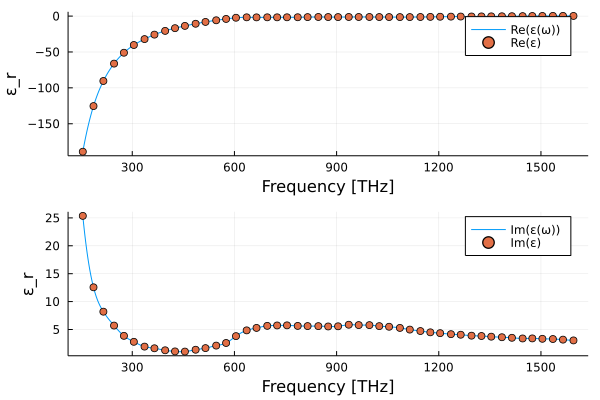

In [25]:
# f_Au = c_0 ./ (λ_Au * 1u"μm") .|> u"THz"
# ω_Au = 2π * c_0 ./ (λ_Au * 1u"μm") .|> u"THz"
ω_Au  = ustrip.(2π * c_0 ./ (λ_Au * 1u"μm") .|> u"THz")

ω = LinRange(extrema(ω_Au)..., 1000)

m = PermittivityTable(ω_Au, ε_Au)
ε = m.(ω)

plot(ω/2π, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency [THz]", ylabel="ε_r", layout=(2, 1))
scatter!(ω_Au/2π, [real(ε_Au) imag(ε_Au)], label=["Re(ε)" "Im(ε)"])


In [23]:
Ag = get_material("main","Ag","Johnson")

λ_Ag = Ag.λ 
ñ_Ag = Ag.n + Ag.k * im

ε_Ag = ñ_Ag.^2;

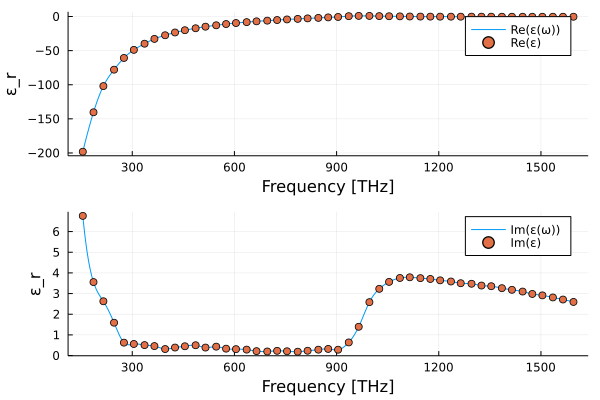

In [24]:
ω_Ag = ustrip.(2π * c_0 ./ (λ_Ag * 1u"μm") .|> u"THz")

ω = LinRange(extrema(ω_Ag)..., 1000)

m = PermittivityTable(ω_Ag, ε_Ag)
ε = m.(ω)

plot(ω/2π, [real(ε) imag(ε)], label=["Re(ε(ω))" "Im(ε(ω))"], xlabel="Frequency [THz]", ylabel="ε_r", layout=(2, 1))
scatter!(ω_Ag/2π, [real(ε_Ag) imag(ε_Ag)], label=["Re(ε)" "Im(ε)"])


# Fitting Drude and Lorentz mondel to measured data